- Perceptron

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [12]:
iris = load_iris()
X = iris.data[:,(2,3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa) 인가?

In [13]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [14]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

- 케라스를 사용하여 데이터셋 적재하기

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [18]:
X_train_full.shape

(60000, 28, 28)

In [19]:
X_train_full.dtype

dtype('uint8')

In [20]:
# 위의 데이터셋은 이미 훈련 세트와 테스트 세트로 나뉘어져 있으나 검증세트는 없다.
# 아래에서 검증세트를 만들고 0~255.0의 스케일을 0~1의 스케일로 조정한다.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [21]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [22]:
class_names[y_train[0]]

'Coat'

- 시퀀셜 API를 사용하여 모델 만들기

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
# 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있다.
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.layers

In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
model.get_layer('dense') is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
weights

array([[ 2.0817749e-02, -3.0544158e-02, -3.3398163e-02, ...,
        -6.7450173e-02,  5.6666434e-03,  6.3997656e-02],
       [-4.2754170e-02, -2.5168240e-02, -5.9112817e-02, ...,
        -5.2167878e-02,  6.5406293e-02,  8.1539303e-03],
       [-7.1498469e-02,  6.0969055e-02, -1.1296779e-02, ...,
        -2.2206765e-02, -3.9146841e-02, -4.4389889e-03],
       ...,
       [-6.3866347e-02, -5.0282825e-02, -6.8586409e-02, ...,
         9.4793737e-05, -3.2134604e-02,  3.3280365e-02],
       [ 6.5540746e-02,  2.0671234e-02,  4.8200652e-02, ...,
        -1.5426859e-02, -2.6044082e-02, -3.4311023e-02],
       [-6.8359688e-02, -6.8689287e-03, -4.9992010e-02, ...,
         3.2251962e-02,  5.5229515e-02,  4.1071467e-02]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.7133 - accuracy: 0.7634 - val_loss: 0.5269 - val_accuracy: 0.8128
Epoch 2/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4873 - accuracy: 0.8315 - val_loss: 0.4549 - val_accuracy: 0.8428
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4431 - accuracy: 0.8456 - val_loss: 0.4135 - val_accuracy: 0.8572
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4141 - accuracy: 0.8547 - val_loss: 0.3944 - val_accuracy: 0.8658
Epoch 5/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3936 - accuracy: 0.8605 - val_loss: 0.3739 - val_accuracy: 0.8708
Epoch 6/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3774 - accuracy: 0.8663 - val_loss: 0.3731 - val_accuracy: 0.8724
Epoch 7/30
55000/55000 [==============================] -

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7060 - accuracy: 0.7694 - val_loss: 0.5332 - val_accuracy: 0.8134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4859 - accuracy: 0.8307 - val_loss: 0.4414 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.8450 - val_loss: 0.4111 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4162 - accuracy: 0.8546 - val_loss: 0.3936 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3966 - accuracy: 0.8605 - val_loss: 0.4032 - val_accuracy: 0.8568
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3795 - accuracy: 0.8665 - val_loss: 0.3704 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3665 - accuracy: 0.8703 - val_loss: 0.3758 - val_accuracy:

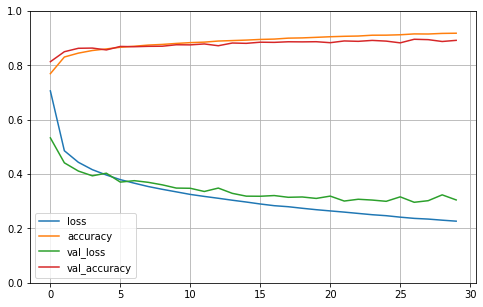

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
# 테스트 세트로 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8848


[0.33332398533821106, 0.8848000168800354]

- 모델을 사용해 예측을 만들기

In [28]:
X_new = X_test[:3] # 여기서는 실제로 새로운 샘플이 없기 때문에 테스트 세트의 앞부분을 사용한다.

In [29]:
y_proba = model.predict(X_new)

In [30]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # 새로운 샘플이라고 생각합니다.
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8696 - val_loss: 3.5560
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5802 - val_loss: 9.9830
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0541 - val_loss: 0.5369
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4426 - val_loss: 0.7167
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4317 - val_loss: 3.6686
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5806 - val_loss: 0.3756
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3930 - val_loss: 0.3572
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3858 - val_loss: 0.3570
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3827 - val_loss: 0.3576
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3748 - val_loss: 0.3470

In [36]:
y_pred

array([[3.8570235],
       [3.0006337],
       [2.0374236]], dtype=float32)

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [37]:
# 와이드 & 딥 신경망 만들기
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [38]:
# 5개의 특성은 짧은 경로로 보내고 6개의 특성은 깊은 경로로 보내는 신경망
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [39]:
# X_train을 전달할 때 (X_train_A, X_train_B) 와 같이 항상 튜플로 전달해야 한다.
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9439 - val_loss: 0.8712
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7524 - val_loss: 0.6306
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6228 - val_loss: 0.5585
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5705 - val_loss: 0.5199
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5397 - val_loss: 0.4945
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5187 - val_loss: 0.4788
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5038 - val_loss: 0.4649
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4927 - val_loss: 0.4549
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4841 - val_loss: 0.4482
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4774 - val_loss: 0.4419

In [40]:
# 여러개의 출력 다루기
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat) # 출력층까지는 이전과 동일
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
# 각 출력은 각자의 손실 함수가 필요(하나의 손실을 전달하면 케라스가 모든 출력의 손실 함수가 동일하다고 가정함)
# 각 출력은 훈련에 사용되는데 이 때 각 출력에 가중치를 부여할 수 있음
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")

In [42]:
# 각 출력에 대한 레이블을 제공
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0490 - main_output_loss: 0.9382 - aux_output_loss: 2.0461 - val_loss: 4.2955 - val_main_output_loss: 4.6179 - val_aux_output_loss: 1.3941
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0461 - main_output_loss: 1.0234 - aux_output_loss: 1.2504 - val_loss: 1.6579 - val_main_output_loss: 1.6918 - val_aux_output_loss: 1.3525
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6783 - main_output_loss: 0.6367 - aux_output_loss: 1.0525 - val_loss: 8.3816 - val_main_output_loss: 9.1804 - val_aux_output_loss: 1.1931
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6894 - main_output_loss: 0.6719 - aux_output_loss: 0.8473 - val_loss: 0.4886 - val_main_output_loss: 0.4580 - val_aux_output_loss: 0.7646
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5096 - main_output_loss: 0.4811 - aux_output_loss: 0.7659 - val_loss

In [43]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B],[y_test,y_test])
# print("total_loss : %.4f, main_loss : %.4f, aux_loss : %.4f"%(total_loss, main_loss, aux_loss))

162/162 [==============================] - 0s 1ms/step - loss: 0.3638 - main_output_loss: 0.3475 - aux_output_loss: 0.5104


In [44]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [45]:
# 높은 유연성이 필요하다면 서브클래싱 API로 구성하면 좋다.
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) ## 표준매개변수를 처리합니다 (예를 들면, name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat - keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

### 10.2.6 모델 저장과 복원

In [46]:
# model = keras.models.Sequential([...])
# model.compile([...])
# model.fit([...])
# model.save("my_keras_model.h5")

In [47]:
# model = keras.models.load_model("my_keras_model.h5")

### 10.2.7 콜백 사용하기

In [3]:
# fit()매서드의 callback 매개변수를 사용하여 케라스가 훈련의 사작이나 끝에 호출할 객체 리스트를 지정할 수 있다.
# [...] # 모델을 만들고 컴파일하기
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_trainl, y_train, epochs=10, callbacks=[checkpoint_cb])

In [4]:
# # 조기 종료를 구현하는 방법 (validation set에서 가장 좋은 점수를 낸 모델을 저장)
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
# model = keras.models.load_model("my_keras_model.h5")

In [5]:
# # EarlyStopping 구현
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs=100,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])

In [6]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [7]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir() #예를 들면, './my_logs/run_2019_06_07-15_15_22'

In [8]:
run_logdir

'.\\my_logs\\run_2020_06_30-02_08_49'

In [9]:
# [...] # 모델 구성과 컴파일
# tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[tensorboard_cb])